# <center>基于CNN+MFCC的语音情感识别</center>

## 一、 实验准备
### 1.1 实验概述

在当今的人工智能时代，语音识别扮演着十分重要的角色。本次实验将会使用的编程语言是Python，并将使用CNN+MFCC来完成一个语音的情感识别。

#### 语音识别：
语音是一个复杂的现象（phenomenon）。人们很少能理解它是怎样产生以及被感知的（perceived）。一个直观的感知（perception，和前面的感知意思类似，只不过词性不同）通常是：语音是由多个词（words）构建的，而每个词又是由多个音素（phones，语音学概念，但在多数情况下和语言学中phonemes(音位)的概念不做区分）构成的。但是很不幸，事实却和人们所感知的差别很大。语音是一个动态的过程，在它的每一部分之间没有明确的界限。因此，了解一段语音的一个很有效的方式是通过一个声音编辑器去观察（look into）下语音的波形（rcording），并去听一下。这是一段通过音频编辑器打开的语音的波形。

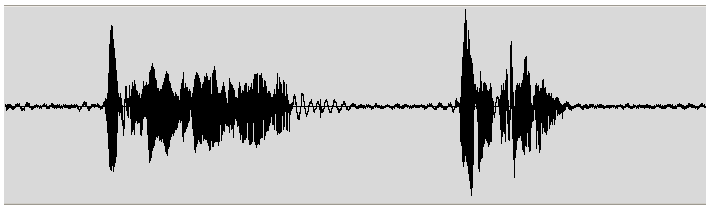

当前所有对语音的刻画的方法或多或少都是用概率。这意味着在单元与单元，或者词与词之间不存在确定的界限。语音转写（speech to text）以及其他语音方面的应用不存在100%正确的情况。这和传统的软件开发人员的想法是相悖（rather unusual）的，他们通常是在确定的（deterministic）系统上进行工作的。这就产生了很多只属于语音技术的概念和话题。

#### 卷积神经网络（CNN）：
神经网络(neual networks)是人工智能研究领域的一部分，当前最流行的神经网络是深度卷积神经网络(deep convolutional neural networks, CNNs)，虽然卷积网络也存在浅层结构，但是因为准确度和表现力等原因很少使用。目前提到CNNs和卷积神经网络，学术界和工业界不再进行特意区分，一般都指深层结构的卷积神经网络，层数从”几层“到”几十上百“不定。

CNNs目前在很多很多研究领域取得了巨大的成功，例如: 语音识别，图像识别，图像分割，自然语言处理等。虽然这些领域中解决的问题并不相同，但是这些应用方法都可以被归纳为:

CNNs可以自动从(通常是大规模)数据中学习特征，并把结果向同类型未知数据泛化。

基础的CNN由 卷积(convolution), 激活(activation), and 池化(pooling)三种结构组成。CNN输出的结果是每幅图像的特定特征空间。当处理图像分类任务时，我们会把CNN输出的特征空间作为全连接层或全连接神经网络(fully connected neural network, FCN)的输入，用全连接层来完成从输入图像到标签集的映射，即分类。当然，整个过程最重要的工作就是如何通过训练数据迭代调整网络权重，也就是后向传播算法。目前主流的卷积神经网络(CNNs)，比如VGG, ResNet都是由简单的CNN调整，组合而来。

这些加粗名词将会在下文详细解释。

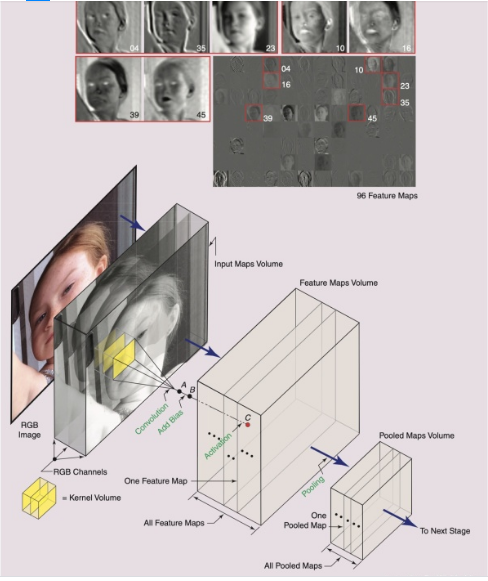

上图显示的是CNN的基础结构，现在大型深层的卷积神经网络(CNNs, 请注意这里是复数)通常由多个上述结构前后连接、层内调整组成，根据功能不同，我们称这些前后连接的结构处于不同阶段(stage)。虽然在主流CNNs中，不同stage里CNN会有不同的单元和结构，比如卷积核 (kernel)大小可能不同，激活函数(activition function) 可能不同，pooling操作可能不存在，但是图1的CNN结构应当能够包含所有的情况。

我们跟随上图来解释，一个stage中的一个CNN，通常会由三种映射空间组成(Maps Volume, 这里不确定是不是应该翻译为映射空间，或许映射体积会更准确),

1、输入映射空间(input maps volume）

2、特征映射空间(feature maps volume）

3、池化映射空间(pooled maps volume)

例如图中，输入的是彩色RGB图像，那么输入的maps volume由红，黄，蓝三通道/三种map构成。我们之所以用input map volume这个词来形容，是因为对于多通道图像输入图像实际上是由高度，宽度，深度三种信息构成,可以被形象理解为一种"体积"。这里的“深度”，在RGB中就是3，红，黄，蓝三种颜色构成的图像，在灰度图像中，就是1。

##### 卷积

CNN中最基础的操作是卷积convolution，再精确一点，基础CNN所用的卷积是一种2-D卷积。也就是说，kernel只能在x,y上滑动位移，不能进行深度 (跨通道) 位移。这可以根据图1来理解，对于图中的RGB图像，采用了三个独立的2-D kernel，如黄色部分所示，所以这个kernel的维度是 X x Y x 3 。在基础CNN的不同stage中，kernel的深度都应当一致，等于输入图像的通道数。

卷积需要输入两个参数，实质是二维空间滤波，滤波的性质与kernel选择有关，CNN的卷积是在一个2-D kernel 和输入的 2-D input map 之间，RGB中各图像通道分别完成。

我们假设单一通道输入图像的空间坐标为（x，y） ，卷积核大小是 p x q ，kernel权重为 w ,图像亮度值是 v ，卷积过程就是kernel 所有权重与其在输入图像上对应元素亮度之和，可以表示为,

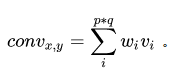

##### 激活

卷积之后，通常会加入偏置(bias), 并引入非线性激活函数(activation function)，这里定义bias为b，activation function 是h() ，经过激活函数后，得到的结果是:

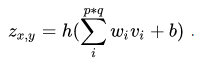

这里请注意，bias不与元素位置相关，只与层有关。主流的activation function 有.

例如采用277*277的RGB图像， 采用96个11*11*3的kernels同时扫描，很容易得到输出的feature maps是96个267*267的二维 feature map, 267*267是单个图像feature map的x,y轴大小，96是卷积核个数，原本的3通道在积分的时候会被作为一个元素加起来。 如上图，这些feature map可视化之后，可以看到4 和35表示边缘特征，23是模糊化的输入，10和16在强调灰度变化，39强调眼睛，45强调红色通道的表现。

##### 池化

池化(pooling），是一种降采样操作(subsampling)，主要目标是降低feature maps的特征空间，或者可以认为是降低feature maps的分辨率。因为feature map参数太多，而图像细节不利于高层特征的抽取。

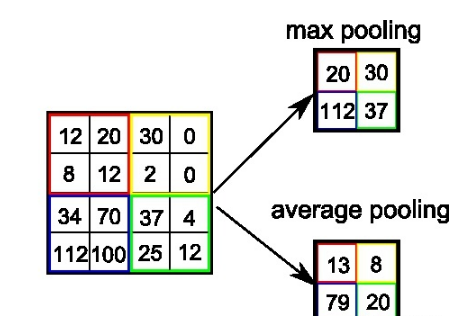

##### 全连接网络

出现在CNN中的全连接网络(fully connected network)主要目的是为了分类, 这里称它为network的原因是，目前CNNs多数会采用多层全连接层，这样的结构可以被认为是网络。如果只有一层，下边的叙述同样适用。它的结构可能如下图所示:

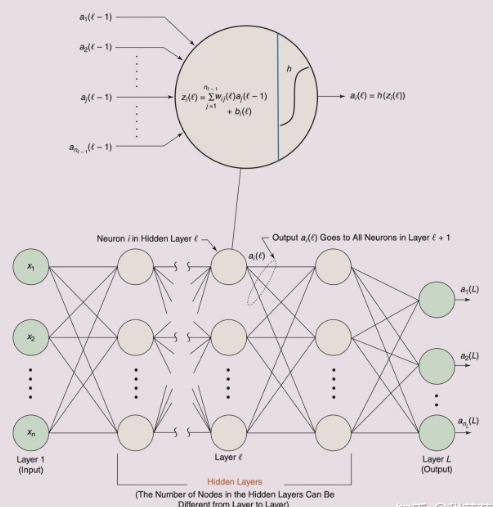

不同于CNN的滑动卷积，全连接网络每一层的所有单元与上一层完全连接。通常，除了输入层和输出层的其他层，都被认为是隐含层。

#### CTC 

CTC（Connectionist temporal classification），可以理解为基于神经网络的时序类分类。其中classification比较好理解，表示分类问题；temporal可以理解为时序类问题，比如语音识别的一帧数据，很难给出一个label，但是几十帧数据就容易判断出对应的发音label，这个词也给出CTC最核心的意义；connectionist可以理解为神经网络中的连接。

比如语音识别的一帧数据，很难给出一个label，但是几十帧数据就容易判断出对应的发音label。
语音识别声学模型的训练属于监督学习，需要知道每一帧对应的label才能进行有效的训练，在训练的数据准备阶段必须要对语音进行强制对齐。 

CTC的引入可以放宽了这种一一对应的限制要求，只需要一个输入序列和一个输出序列即可以训练。

有两点好处：

1）、不需要对数据对齐和一一标注；

2）、CTC直接输出序列预测的概率，不需要外部的后处理。


CTC解决这一问题的方法是，在标注符号集中加一个空白符号blank，然后利用RNN进行标注，最后把blank符号和预测出的重复符号消除。比如有可能预测除了一个"--a-bb"，就对应序列"ab"。这样就让RNN可以对长度小于输入序列的标注序列进行预测了。
RNN的训练需要用到前向后向算法（Forward-backward algorithm），对于给定预测序列，比如“ab”，在各个字符间插入空白符号，建立起篱笆网络（Trellis），然后对将所有可能映射到给定预测的序列都穷举出来求和。

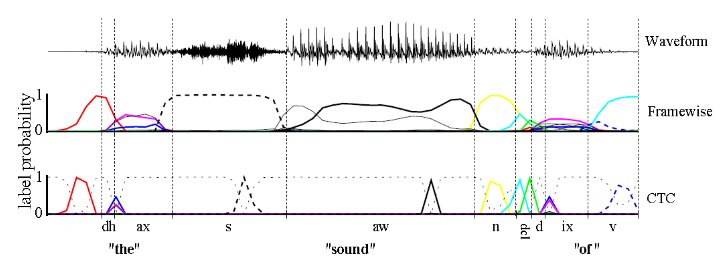

如上图，传统的Framewise训练需要进行语音和音素发音的对齐，比如“s”对应的一整段语音的标注都是s；而CTC引入了blank（该帧没有预测值），“s”对应的一整段语音中只有一个spike（尖峰）被认为是s，其他的认为是blank。对于一段语音，CTC最后的输出是spike的序列，不关心每一个音素对应的时间长度。

##### 输出 
语音识别中的DNN训练，每一帧都有相应的状态标记，比如有5帧输入x1,x2,x3,x4,x5，对应的标注分别是状态a1,a1,a1,a2,a2。
CTC的不同之处在于输出状态引入了一个blank，输出和label满足如下的等价关系：



多个输出序列可以映射到一个输出。

#### MFCC

在语音识别（SpeechRecognition）和话者识别（SpeakerRecognition）方面，最常用到的语音特征就是梅尔倒谱系数（Mel-scaleFrequency Cepstral Coefficients，简称MFCC）。根据人耳听觉机理的研究发现，人耳对不同频率的声波有不同的听觉敏感度。从200Hz到5000Hz的语音信号对语音的清晰度影响对大。两个响度不等的声音作用于人耳时，则响度较高的频率成分的存在会影响到对响度较低的频率成分的感受，使其变得不易察觉，这种现象称为掩蔽效应。由于频率较低的声音在内耳蜗基底膜上行波传递的距离（速度）大于频率较高的声音，故一般来说，低音容易掩蔽高音，而高音掩蔽低音较困难。在低频处的声音掩蔽的临界带宽较高频要小。所以，人们从低频到高频这一段频带内按临界带宽的大小由密到疏安排一组带通滤波器，对输入信号进行滤波。将每个带通滤波器输出的信号能量作为信号的基本特征，对此特征经过进一步处理后就可以作为语音的输入特征。由于这种特征不依赖于信号的性质，对输入信号不做任何的假设和限制，又利用了听觉模型的研究成果。因此，这种参数比基于声道模型的LPCC相比具有更好的鲁邦性，更符合人耳的听觉特性，而且当信噪比降低时仍然具有较好的识别性能。

​ 我们将频谱通过一组Mel滤波器就得到Mel频谱。公式表述就是：log X[k] = log (Mel-Spectrum)。这时候我们在log X[k]上进行倒谱分析：

1）取对数：log X[k] = log H[k] + log E[k]。

2）进行逆变换：x[k] = h[k] + e[k]。

​ 在Mel频谱上面获得的倒谱系数h[k]就称为Mel频率倒谱系数，简称MFCC。

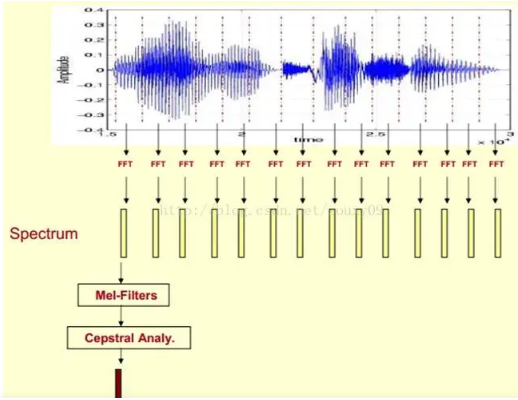

#### 神经网络结构

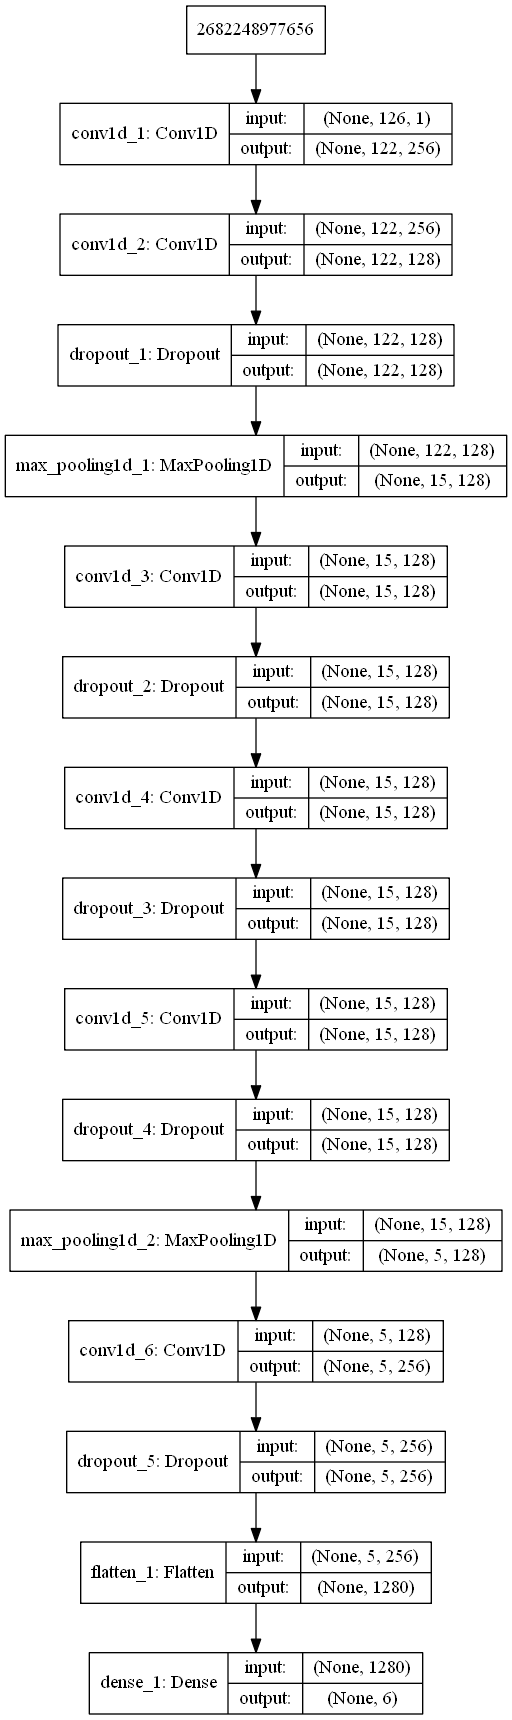

### 1.2 实验目的

* 理解语音识别的原理
* 理解CNN与MFCC的基本原理
* 掌握CNN与MFCC进行建模的方法
* 掌握CNN与MFCC在语音识别中的应用


### 1.3 实验环境
实验环境：python3.6以上、Numpy、Jupyter Notebook、Google Chrome\IE浏览器

## 二、 实验步骤
### 2.1 数据集

本次实验，我们使用到是CASIA的语音情感数据库。CASIA汉语情感语料库由中国科学院自动化所（Institute of Automation, Chinese Academy of Sciences）录制，共包括四个专业发音人，六种情绪生气（angry）、高兴（happy）、害怕（fear）、悲伤（sad）、惊讶（surprise）和中性（neutral），共9600句不同发音。其中300句是相同文本的，也即是说对相同的文本赋以不同的情感来阅读，这些语料可以用来对比分析不同情感状态下的声学及韵律表现；另外100句是不同文本的，这些文本从字面意思就可以看出其情感归属，便于录音人更准确地表现出情感。

#### 2.1.1 数据加载

我们将开始加载声音，取声音的前两秒进行情感分析。getNearestLen()函数根据声音的采样率确定一个合适的语音帧长用于傅立叶变换。然后通过librosa.feature.mfcc()函数提取mfcc特征，并将其可视化。
我们使用librosa模块进行MFCC的提取，提取代码如下:

In [2]:
# 代码实现
%matplotlib inline
import librosa 
import matplotlib.pyplot as plt
import numpy as np

path=r'test.wav'

y,sr = librosa.load(path,sr=None)

def normalizeVoiceLen(y,normalizedLen):
    nframes=len(y)
    y = np.reshape(y,[nframes,1]).T
    #归一化音频长度为2s,32000数据点
    if(nframes<normalizedLen):
        res=normalizedLen-nframes
        res_data=np.zeros([1,res],dtype=np.float32)
        y = np.reshape(y,[nframes,1]).T
        y=np.c_[y,res_data]
    else:
        y=y[:,0:normalizedLen]
    return y[0]

def getNearestLen(framelength,sr):
    framesize = framelength*sr  
    #找到与当前framesize最接近的2的正整数次方
    nfftdict = {}
    lists = [32,64,128,256,512,1024]
    for i in lists:
        nfftdict[i] = abs(framesize - i)
    sortlist = sorted(nfftdict.items(), key=lambda x: x[1])#按与当前framesize差值升序排列
    framesize = int(sortlist[0][0])#取最接近当前framesize的那个2的正整数次方值为新的framesize
    return framesize

VOICE_LEN=32000
#获得N_FFT的长度
N_FFT=getNearestLen(0.25,sr)
#统一声音范围为前两秒
y=normalizeVoiceLen(y,VOICE_LEN)
print(y.shape)
#提取mfcc特征
mfcc_data=librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13,n_fft=N_FFT,hop_length=int(N_FFT/4))




(32000,)


### 任务一、请用matplotlib.pyplot 库对声音的MFCC特征进行可视化，并设置Title为 MFCC

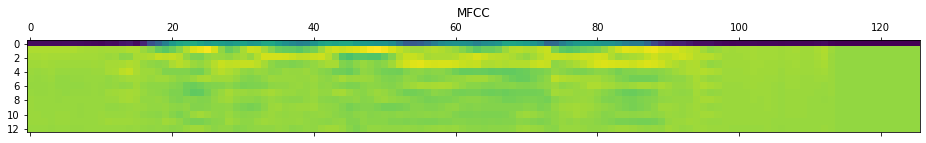



Text(0.5, 1.0, 'MFCC')

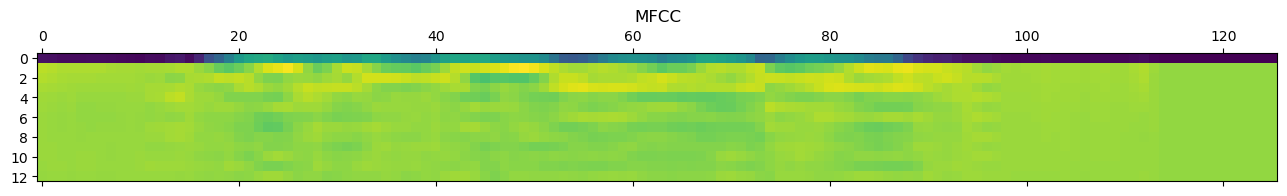

In [3]:
# 请在此处编写代码，完成上面的任务
import matplotlib.pyplot as plt
# 画出特征图，将MFCC可视化。转置矩阵，使得时域是水平的
plt.matshow(mfcc_data)
plt.title('MFCC')

#### 2.1.2 MFCC特征提取

接下来，我们将数据集中的mfcc特征提取出来，并对每帧的mfcc取平均，将结果保存为文件。

In [4]:
#代码实现
#提取特征
import os
import pickle

counter=0
fileDirCASIA = r'CASIA database'

mfccs={}
mfccs['angry']=[]
mfccs['fear']=[]
mfccs['happy']=[]
mfccs['neutral']=[]
mfccs['sad']=[]
mfccs['surprise']=[]
mfccs['disgust']=[]

listdir=os.listdir(fileDirCASIA)
for persondir in listdir:
    if(not r'.' in persondir):
        emotionDirName=os.path.join(fileDirCASIA,persondir)
        emotiondir=os.listdir(emotionDirName)
        for ed in emotiondir:
            if(not r'.' in ed):
                filesDirName=os.path.join(emotionDirName,ed)
                files=os.listdir(filesDirName)
                for fileName in files:
                    if(fileName[-3:]=='wav'):
                        counter+=1
                        fn=os.path.join(filesDirName,fileName)
                        print(str(counter)+fn)
                        y,sr = librosa.load(fn,sr=None)
                        y=normalizeVoiceLen(y,VOICE_LEN)#归一化长度
                        mfcc_data=librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13,n_fft=N_FFT,hop_length=int(N_FFT/4))
                        feature=np.mean(mfcc_data,axis=0)
                        mfccs[ed].append(feature.tolist())


1CASIA database/liuchanhg/angry/201.wav
2CASIA database/liuchanhg/angry/202.wav
3CASIA database/liuchanhg/angry/203.wav
4CASIA database/liuchanhg/angry/204.wav
5CASIA database/liuchanhg/angry/205.wav
6CASIA database/liuchanhg/angry/206.wav
7CASIA database/liuchanhg/angry/207.wav
8CASIA database/liuchanhg/angry/208.wav
9CASIA database/liuchanhg/angry/209.wav
10CASIA database/liuchanhg/angry/210.wav
11CASIA database/liuchanhg/angry/211.wav
12CASIA database/liuchanhg/angry/212.wav
13CASIA database/liuchanhg/angry/213.wav
14CASIA database/liuchanhg/angry/214.wav
15CASIA database/liuchanhg/angry/215.wav
16CASIA database/liuchanhg/angry/216.wav
17CASIA database/liuchanhg/angry/217.wav
18CASIA database/liuchanhg/angry/218.wav
19CASIA database/liuchanhg/angry/219.wav
20CASIA database/liuchanhg/angry/220.wav
21CASIA database/liuchanhg/angry/221.wav
22CASIA database/liuchanhg/angry/222.wav
23CASIA database/liuchanhg/angry/223.wav
24CASIA database/liuchanhg/angry/224.wav
25CASIA database/liuchanh

### 任务二、pickle组件把上面的mfccs对象写入到“mfcc_feature_dict.pkl”文件中，并保存在当前目录下


In [5]:
with open('mfcc_feature_dict.pkl', 'wb') as f:
    pickle.dump(mfccs, f)

#### 2.1.3 数据预处理

接下来对提取出特征之后的数据进行预处理，方便把它们喂给神经网络。

In [6]:
#代码实现

%matplotlib inline
import pickle
import os
import librosa 
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import to_categorical

#读取特征
mfccs={}
with open('mfcc_feature_dict.pkl', 'rb') as f:
    mfccs=pickle.load(f)

#设置标签
emotionDict={}
emotionDict['angry']=0
emotionDict['fear']=1
emotionDict['happy']=2
emotionDict['neutral']=3
emotionDict['sad']=4
emotionDict['surprise']=5

data=[]
labels=[]
data=data+mfccs['angry']
print("angry记录有：%s 条" % len(mfccs['angry']))
for i in range(len(mfccs['angry'])):
    labels.append(0)

data=data+mfccs['fear']
print("fear记录有：%s 条" % len(mfccs['fear']))
for i in range(len(mfccs['fear'])):
    labels.append(1)

print("happy记录有：%s 条" % len(mfccs['happy']))
data=data+mfccs['happy']
for i in range(len(mfccs['happy'])):
    labels.append(2)

print("neutral记录有：%s 条" % len(mfccs['neutral']))    
data=data+mfccs['neutral']
for i in range(len(mfccs['neutral'])):
    labels.append(3)

print("sad记录有：%s 条" % len(mfccs['sad'])) 
data=data+mfccs['sad']
for i in range(len(mfccs['sad'])):
    labels.append(4)

print("surprise记录有：%s 条" % len(mfccs['surprise'])) 
data=data+mfccs['surprise']
for i in range(len(mfccs['surprise'])):
    labels.append(5)

print("合计记录有：%s 条" % len(data))
print("合计label记录有：%s 条" %len(labels))

#设置数据维度
data=np.array(data)
data=data.reshape((data.shape[0],data.shape[1],1))

labels=np.array(labels)
labels=to_categorical(labels)

#数据标准化
DATA_MEAN=np.mean(data,axis=0)
DATA_STD=np.std(data,axis=0)

data-=DATA_MEAN
data/=DATA_STD
    #接下来保存好参数，模型预测的时候需要用到。

paraDict={}
paraDict['mean']=DATA_MEAN
paraDict['std']=DATA_STD
paraDict['emotion']=emotionDict
with open('mfcc_model_para_dict.pkl', 'wb') as f:
    pickle.dump(paraDict, f)


2024-04-19 02:50:40.912353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 02:50:41.871512: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 02:50:41.871593: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 02:50:41.877152: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-19 02:50:43.007771: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 02:50:43.025186: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

angry记录有：200 条
fear记录有：200 条
happy记录有：200 条
neutral记录有：200 条
sad记录有：200 条
surprise记录有：200 条
合计记录有：1200 条
合计label记录有：1200 条


#### 2.1.4 混洗

打乱数据集并划分训练数据和测试数据，使得训练和测试的数据更符合实际情况。

In [7]:
#代码实现

ratioTrain=0.8
numTrain=int(data.shape[0]*ratioTrain)
permutation = np.random.permutation(data.shape[0])
data = data[permutation,:]
labels = labels[permutation,:]

x_train=data[:numTrain]
x_val=data[numTrain:]
y_train=labels[:numTrain]
y_val=labels[numTrain:]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)


(960, 126, 1)
(960, 6)
(240, 126, 1)
(240, 6)


#### 2.1.5 定义模型

使用keras定义神经网络的模型，即搭建CNN的网络结构，可参见实验开头中的神经网络结构进行理解。

In [8]:
#请在此处写你的代码
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv1D(256,5,activation='relu',input_shape=(126,1)))
model.add(layers.Conv1D(128,5,padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Conv1D(128,5,activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128,5,activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128,5,padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling1D(pool_size=(3)))
model.add(layers.Conv1D(256,5,padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(6,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 122, 256)          1536      
                                                                 
 conv1d_1 (Conv1D)           (None, 122, 128)          163968    
                                                                 
 dropout (Dropout)           (None, 122, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 128)           0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 128)           82048     
                                                                 
 dropout_1 (Dropout)         (None, 15, 128)           0         
                                                        

### 任务三、用plot_model显示模型的架构信息

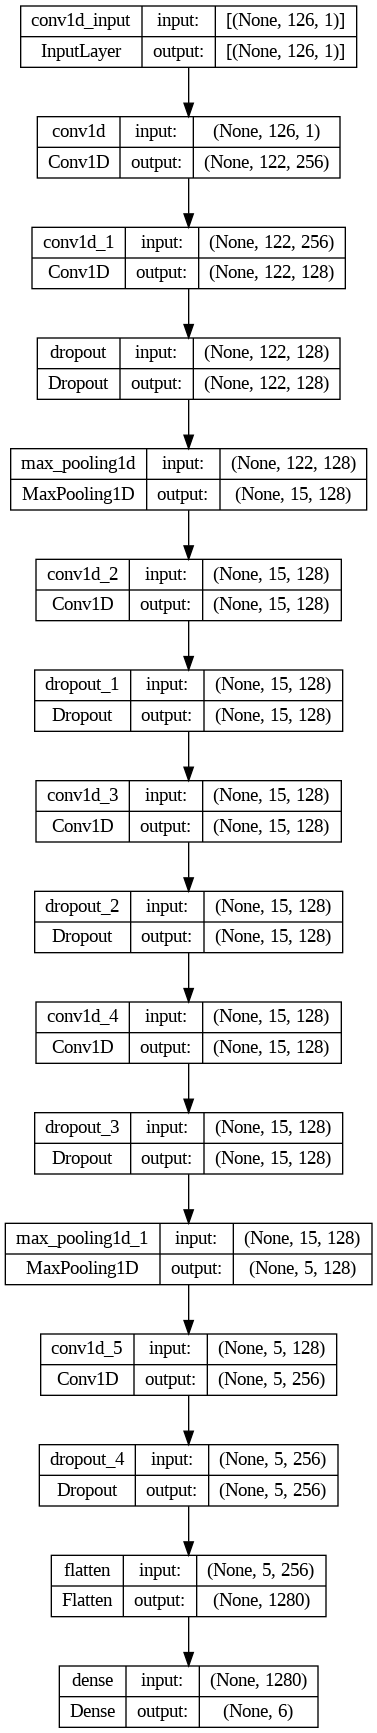

In [9]:
from keras.utils import plot_model
plot_model(model,to_file='mfcc_model.png',show_shapes=True)


#### 2.1.6 训练模型

编译并训练模型，在数据处理完成、模型也建模完成后，就可以进行模型的训练了。

经测试，模型在训练了60轮后开始过拟合，此时训练精度达到70%，验证精度达到50%。最终训练到200轮后，训练精度达到95%。

In [10]:
#请在此处写你的代码

from tensorflow.keras import optimizers

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=100000,
    decay_rate=0.96)

opt = optimizers.RMSprop(learning_rate=lr_schedule)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
import keras
callbacks_list=[
    keras.callbacks.EarlyStopping(
        monitor='acc',
        patience=50,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='speechmfcc_model_checkpoint.h5',
        monitor='val_loss',
        save_best_only=True
    ),
    keras.callbacks.TensorBoard(
        log_dir='speechmfcc_train_log'
    )
]

history=model.fit(x_train, y_train,  #输入输出
                  batch_size=16,  #批量16
                  epochs=200, #迭代200次
                  validation_data=(x_val, y_val),
                 callbacks=callbacks_list)
model.save('speech_mfcc_model.h5')
model.save_weights('speech_mfcc_model_weight.h5')



Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 2.4750 - accuracy: 0.2115WARNING:tensorflow:Early stopping conditioned on metric `acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 16s 150ms/step - loss: 2.4750 - accuracy: 0.2115 - val_loss: 2.4555 - val_accuracy: 0.1833
Epoch 2/200
60/60 [==============================] - 8s 125ms/step - loss: 2.3469 - accuracy: 0.2958 - val_loss: 2.3576 - val_accuracy: 0.2208
Epoch 3/200
60/60 [==============================] - 8s 127ms/step - loss: 2.2676 - accuracy: 0.3385 - val_loss: 2.3035 - val_accuracy: 0.3292
Epoch 4/200
60/60 [==============================] - 8s 133ms/step - loss: 2.2147 - accuracy: 0.3594 - val_loss: 2.2684 - val_accuracy: 0.2833
Epoch 5/200
60/60 [==============================] - 8s 132ms/step - loss: 2.1537 - accuracy: 0.3844 - val_loss: 2.2161 - val_accuracy: 0.3333
Epoch 6/200
60/60 [==============================] - 8s 133ms/step - loss: 2.0891 - accuracy: 0.4125 - val_loss: 2.1569 - val_accuracy: 0.3500
Epoch 7/200
60/60 [==============================] - 9s 149ms/step - loss: 2.0566 - accuracy: 0.4292 - val_loss: 2.1845 - val_accuracy: 0.3625
Epoch 8/20

### 任务四、训练结果的可视化

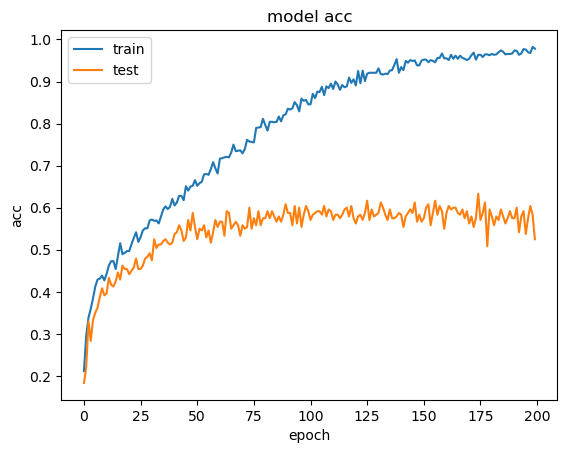

In [11]:
#可视化训练结果：

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#### 2.1.7 测试

最后，使用训练好的模型进行测试。

In [12]:
#请在此处写你的代码

from keras.models import load_model
import pickle

model=load_model('speech_mfcc_model.h5')
paradict={}
with open('mfcc_model_para_dict.pkl', 'rb') as f:
    paradict=pickle.load(f)
DATA_MEAN=paradict['mean']
DATA_STD=paradict['std']
emotionDict=paradict['emotion']
edr = dict([(i, t) for t, i in emotionDict.items()])


### 任务五、用模型预测这三个文件的情感（"./tests/sad-201.wav","./tests/fear-201.wav","./tests/angry-201.wav"）

In [13]:
import librosa

for filePath in ["./tests/sad-201.wav","./tests/fear-201.wav","./tests/angry-201.wav"]:
    y,sr = librosa.load(filePath,sr=None)
    y=normalizeVoiceLen(y,VOICE_LEN)#归一化长度
    mfcc_data=librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13,n_fft=N_FFT,hop_length=int(N_FFT/4))
    feature=np.mean(mfcc_data,axis=0)
    feature=feature.reshape((126,1))
    feature-=DATA_MEAN
    feature/=DATA_STD
    feature=feature.reshape((1,126,1))
    result=model.predict(feature)
    index=np.argmax(result, axis=1)[0]
    print(filePath,edr[index])

1/1 [==============================] - 0s 419ms/step
./tests/sad-201.wav sad
1/1 [==============================] - 0s 86ms/step
./tests/fear-201.wav fear
1/1 [==============================] - 0s 45ms/step
./tests/angry-201.wav angry


## 三、实验总结
通过本次实验，我们能够掌握CNN+MFCC进行语音情感识别的方法、流程以及应用；做完本次实验后，我们不难发现深度学习在语音识别上表现出来的强大的能力，而且图像处理、自然语言处理、语言识别等都存在很大的关联度。

## 四、思考与练习
实验中，不知道我们有没有认真的去观察CNN与MFCC结合起来在语音识别上也能有很好的效果， 你是否还知道其他的组合？比如有哪些呢？优缺点又是什么？